In [7]:
import sqlite3
import pandas as pd

conn=sqlite3.connect('datasets/database.sqlite')

df=pd.read_sql_query("SELECT * FROM Iris",conn)

In [13]:
conn.close()
print(df.head())
print(df.tail())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2


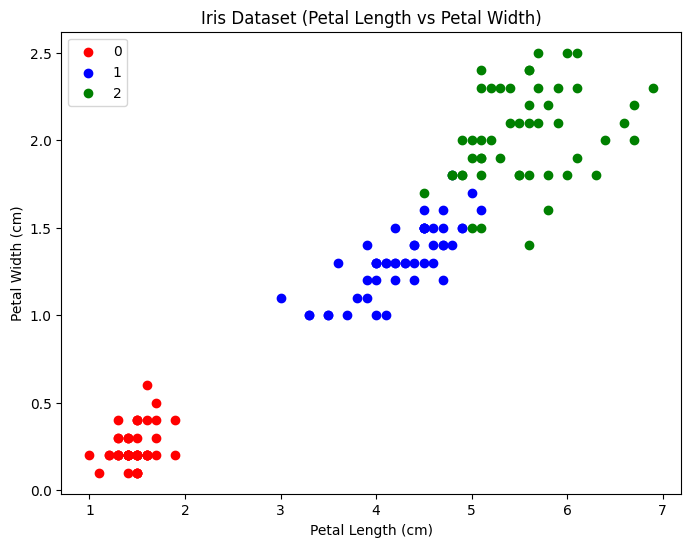

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])

plt.figure(figsize=(8,6))

for label, color in zip([0, 1, 2], ['red', 'blue', 'green']):
    subset = df[df['Species'] == label]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], 
                label=encoder.inverse_transform([label])[0],
                color=color)

plt.title("Iris Dataset (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
print(X.head())
print(y.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=22,test_size=0.5)


In [26]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

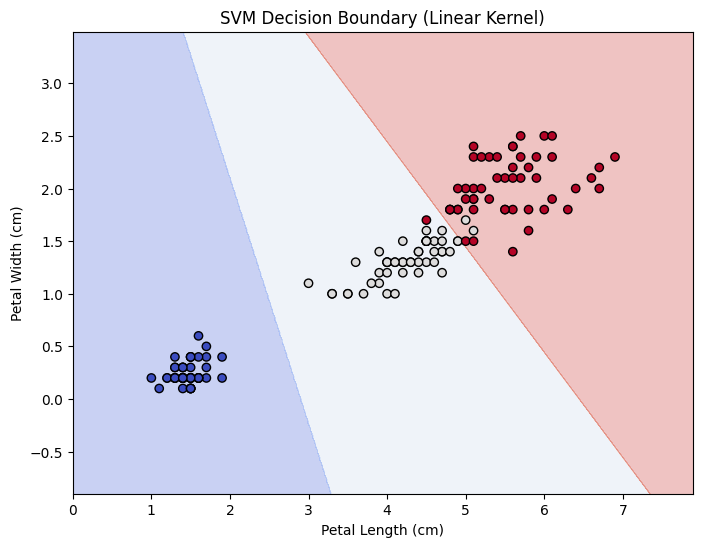

In [27]:
import numpy as np
X_vis = X[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = y.values
svm_2d = SVC(kernel='linear')
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.5, random_state=22)
svm_2d.fit(X_train_vis, y_train_vis)

# Create mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.legend(handles=scatter.legend_elements()[0], labels=np.unique(y_vis), title="Classes")
plt.show()